# Udacity Data Analyst Nanodegree

# P2: Investigate the Titanic dataset

Date: 14.11.2017<br>
Author: Diogo Adão e Silva

## Context
This notebook is my project 'Investigate a dataset' submission. Delivering this project is one of the requirements of Udacity's [Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002). By successfully completing this project, Udacity students demonstrate they know how to go through the entire data analysis process.

## Structure
To start, a quick background on the Titanic is given. Next, the goal of the project is set, followed by an introduction to the dataset. The following step is the exploratory data analysis. Next is hypotheses testing and finally, conclusions are drawn.

## Background
The sinking of the RMS Titanic in April 1912 is one of the most well-known shipwrecks in history. **The Titanic sailed with 2,208 passengers and crew**<sup>1</sup> on April 1912 from Southampton, England. Four days later she collided with an iceberg and sank, leading to the **death of 1496 people**<sup>1</sup>. The Titanic continues to fascinate people up to our day, there is extensive information related to the shipwreck online (eg. [here](https://www.encyclopedia-titanica.org)) and there is even a full-sized replica currently under construction in China.

![alt text](https://raw.githubusercontent.com/DiogoAdaoeSilva/DAND/master/p2/Titanic-departing-1912.jpg "Titanic departing 1912")

*<center>Titanic departing in 1912 - Source: oldpicsarchive.com</center>*

# Question Phase

The goal of the project is to:

1. Determine which factors made Titanic passengers more likely to survive
2. Provide an overview of the demographics of the passengers in the dataset
3. Draw conclusions about the relationships between passenger sex, class and the likelihood of surviving a shipwreck

The following variables are analyzed:
    - Class
    - Sex
    - Age
    - Embark location
    - Travelling with a relative (sibling, spouse, parent or children)
    - Fare
    - Passengers with the same ticket

# Wrangling Phase

## Dataset Aquisition

The curated dataset for the project contains demographics from 891 passengers and crew on board the RMS Titanic. It was downloaded from Udacity, which obtained it on [Kaggle](https://www.kaggle.com/c/titanic/data), where the full dataset and a more detailed description can be found.

The Titanic dataset is very popular and suited for those getting started with data science and machine learning. Just at Kaggle, over 9,000 teams have participated in the Titanic competition.

In [1]:
# upload the csv
import pandas as pd
titanic_df = pd.read_csv('titanic-data.csv')

In [2]:
# preview dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# dimensions of dataframe
titanic_df.shape

(891, 12)

In [4]:
# get descriptive statistics

def highlight_lower_count(val):
    """
    highlight values in columns that do not have records for all passengers
    """
    return 'background-color: yellow' if val < len(titanic_df) else ''

def highlight_zeroes(val):
    """
    highlight values that are equal to zero
    """
    return 'background-color: yellow' if val == 0 else ''

titanic_df.describe(include='all').style.\
                                    applymap(highlight_lower_count, subset=pd.IndexSlice['count',]).\
                                    applymap(highlight_zeroes, subset='Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714,891,891,891,891,204,889
unique,nan,nan,nan,891,2,nan,nan,nan,681,nan,147,3
top,nan,nan,nan,"Laleff, Mr. Kristo",male,nan,nan,nan,347082,nan,C23 C25 C27,S
freq,nan,nan,nan,1,577,nan,nan,nan,7,nan,4,644
mean,446,0.383838,2.30864,nan,nan,29.6991,0.523008,0.381594,nan,32.2042,nan,nan
std,257.354,0.486592,0.836071,nan,nan,14.5265,1.10274,0.806057,nan,49.6934,nan,nan
min,1,0,1,nan,nan,0.42,0,0,nan,0,nan,nan
25%,223.5,0,2,nan,nan,20.125,0,0,nan,7.9104,nan,nan
50%,446,0,3,nan,nan,28,0,0,nan,14.4542,nan,nan
75%,668.5,1,3,nan,nan,38,1,0,nan,31,nan,nan


## Data Cleaning

By viewing 'count', the first row in the table above, it is evident that the variables 'Age', 'Cabin' and 'Embarked' do not have records for the all the passengers. It is also worth noticing that the 'Fare' column has a value of 0.00 in the 'min' row. This indicates that before analysing relationships involving these variables it is a good idea to clean the data.

### *Age*

A common practice to deal with missing values in variables such as age is ts to replace them with the mean or median, assuming that missing values are distributed similarly to the values that are present. With this approach the 177 missing values would be replaced either by 29.7 (mean) or 28 (median). This could introduce bias in the relation between age and survival. More fine-tuned approaches could be used, such as grouping passengers by class and sex and then replacing the missing age values within each group by the mean age of the group.

However, it can be considered that having 714 passanges with age data is a subset large enough to check for a relation between age and survival and that it is better to analyze this relation using just the present data, than to affect the relation with data imputed from the mean or median.

Therefore for subsequent analyses of age, a dataframe containing only the subset of passengers that have age value will be used.

In [5]:
# get a dataframe where all passengers have age record
dropna_age_df = titanic_df.dropna(axis=0, how='any', subset= ['Age'])

### *Fare*

In [6]:
import numpy as np

# find out how many fares need to be replaced
print('number of fares to be replaced:')
print(len(titanic_df[titanic_df['Fare']==0]))

# mean fare value for each passenger class
print('mean fares by passenger class')
print(titanic_df.groupby('Pclass')['Fare'].mean())

# create FareNew column, fill with values from 'Fare' column or with the mean age of the respective passenger class
# the following function was taken from Udacity´s student forum
def replace_fare(grp):
    grp['FareNew'] = np.where(((grp['Fare'] ==0) | (grp['Fare'].isnull())), grp['Fare'].mean(),grp['Fare'])
    return grp

titanic_df = titanic_df.groupby('Pclass').apply(replace_fare)

# print the results to compare
print(titanic_df[((titanic_df['Fare'] ==0) | (titanic_df['Fare'].isnull()))][['FareNew','Fare','Pclass']])

titanic_df.drop(['Fare'], axis=1, inplace=True)

number of fares to be replaced:
15
mean fares by passenger class
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
       FareNew  Fare  Pclass
179  13.675550   0.0       3
263  84.154687   0.0       1
271  13.675550   0.0       3
277  20.662183   0.0       2
302  13.675550   0.0       3
413  20.662183   0.0       2
466  20.662183   0.0       2
481  20.662183   0.0       2
597  13.675550   0.0       3
633  84.154687   0.0       1
674  20.662183   0.0       2
732  20.662183   0.0       2
806  84.154687   0.0       1
815  84.154687   0.0       1
822  84.154687   0.0       1


All fares with value equal to zero were replaced with the mean fare of the passenger's class. The column 'Fare' was dropped, as only the column 'FareNew' will be used for the analysis.

### *Cabin*

The variable 'Cabin', which has entries for only 204 passengers, is missing too many values to be useful. In this case, the best solution is to delete the column. Another possible solution would be to use imputation to replace the missing data, but it is not clear which relation with which variables could be the basis for the imputation. 

Since 'Cabin' values consist of a letter followed by a number, e.g. C85, it is worth taking an extra step to check and observe only the letter part of the value.

In [7]:
# add column 'cabin-letter' with first character of value in column 'Cabin'
titanic_df['cabin-letter'] = titanic_df['Cabin'].str[0]

# group unique cabin-letter values by passenger class
for i in range(1,4):
    print('Pclass {}: {}'.format(i, sorted(titanic_df[titanic_df['Cabin'].notnull()\
                                                      & (titanic_df['Pclass'] == i)]['cabin-letter'].unique())))

Pclass 1: ['A', 'B', 'C', 'D', 'E', 'T']
Pclass 2: ['D', 'E', 'F']
Pclass 3: ['E', 'F', 'G']


Of all variables, passenger class is assumed to be the one that most likely is related with 'cabin-letter'. As the result above shows, some letters are exclusive to one or to two passenger classes. Although this seems to point to a possible relation between these two variables, there is still too much uncertainty on how to replace the missing values and therefore it is better to drop the 'Cabin' and 'cabin-letter' columns, than to keep the columns uninformative as they are, or to replace the missing values with likely noisy data.

In [8]:
# remove columns Cabin and cabin-letter
titanic_df.drop(['Cabin', 'cabin-letter'], axis=1, inplace=True)

### *Embarked*

In [9]:
titanic_df['Embarked'].fillna('S', inplace=True)

For categorical data, it is common to replace missing values with the mode. With only two missing values in the column 'Embarked', this is the right approach.

# Explore Phase

## 1. Which factors made passengers more likely to survive?

For most of the analyses, a stacked bar chart showing the survival rate for different passenger groups is presented.

### *Class*

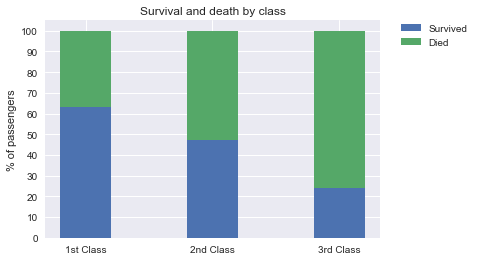

In [10]:
# import the libraries needed to create the charts
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# view survival and death rate for passenger class (1st, 2nd and 3rd)
survival_by_class = 100 * (titanic_df.groupby('Pclass')['Survived'].mean())
died_by_class = (100 - survival_by_class)


N = len(survival_by_class)
ind = np.arange(N) # the x locations for the groups
width = 0.40       # the width of the bars

p1 = plt.bar(ind, survival_by_class, width, label='Survived')
p2 = plt.bar(ind, died_by_class, width, bottom=survival_by_class, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival and death by class')
plt.xticks(ind, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 110, 10))

# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The chart above shows a strong contrast between the survival rate in different passenger classes. The survival rates in the 1st, 2nd and 3rd class were approximately 63%, 47% and 24%, respectively.

### *Sex*

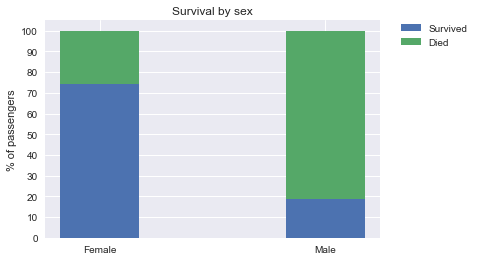

In [11]:
# view survival and death rate for passengers grouped by sex

survival_by_sex = 100 * (titanic_df.groupby('Sex')['Survived'].mean())
died_by_sex = (100 - survival_by_sex)


N = len(survival_by_sex)
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, survival_by_sex, width, label='Survived')
p2 = plt.bar(ind, died_by_sex, width,
             bottom=survival_by_sex, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival by sex')
plt.xticks(ind, ('Female', 'Male'))
plt.yticks(np.arange(0, 110, 10))
# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The suvival rate for male and female passengers is approximately 74% and 19% respectively.

### *Age*

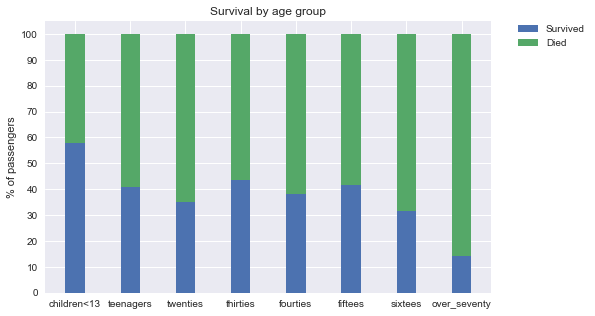

In [12]:
# get survival and death rate for an age interval
def age_group(age_start,age_end=120):
    survival_age = 100 * (dropna_age_df[(dropna_age_df['Age']>=age_start) \
                                    & (dropna_age_df['Age']<age_end)]['Survived'].mean())
    die_age = 100 - survival_age
    return survival_age, die_age

# get survival and death rate for ages groups I am interested in
age_groups = {
'children': age_group(0,13),
'teenagers': age_group(13,20),
'twenties': age_group(20,30),
'thirties': age_group(30,40),
'fourties': age_group(40,50),
'fiftees': age_group(50,60),
'sixtees': age_group(60,70),
'over_seventy': age_group(70)
}
 
# get the list of scalars (height of the bars in the chart)
survival_by_age = []
die_by_age = []
for key, value in age_groups.items():
    survival_by_age.append(value[0])
    die_by_age.append(value[1])

# turn the lists into numpy arrays in order to use them for the bar chart    
survival_by_age = np.array(survival_by_age)
died_by_age = np.array(die_by_age)

# increase figure size to avoid x-tick labels overlapping
plt.figure(figsize=(8,5))

# plot the stacked bar chart         
N = len(survival_by_age)
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, survival_by_age, width, label='Survived')
p2 = plt.bar(ind, died_by_age, width,
             bottom=survival_by_age, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival by age group')
plt.xticks(ind, ('children<13', 'teenagers', 'twenties', 'thirties', 'fourties', \
                 'fiftees', 'sixtees', 'over_seventy'))
plt.yticks(np.arange(0, 110, 10))

# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The chart shows that the survival rate for the children group (less than thirteen years old) is close to 60%. For the other age groups the survival rate is between 30 to 45%, except for the over-seventy-years old group, where less than 20% of the passengers survived.

### *Embark location*

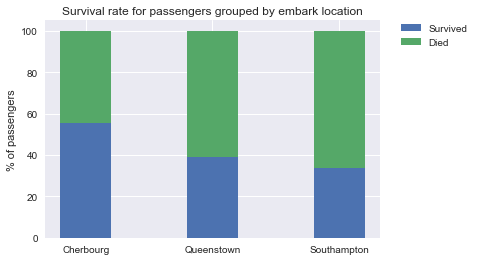

In [13]:
# view survival and death rate for passengers grouped by embark location
survival_by_embark = 100 * (titanic_df.groupby('Embarked')['Survived'].mean())
died_by_embark = (100 - survival_by_embark)


N = len(survival_by_embark)
ind = np.arange(N) # the x locations for the groups
width = 0.40       # the width of the bars

p1 = plt.bar(ind, survival_by_embark, width, label='Survived')
p2 = plt.bar(ind, died_by_embark, width, bottom=survival_by_embark, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival rate for passengers grouped by embark location')
plt.xticks(ind, ('Cherbourg', 'Queenstown', 'Southampton'))
plt.yticks(np.arange(0, 110, 20))

# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

There is a visible difference between the survival rate of passengers who embarked in Cherbourg and Southampton.

### *Travelling with a sibling, spouse, parent or child*

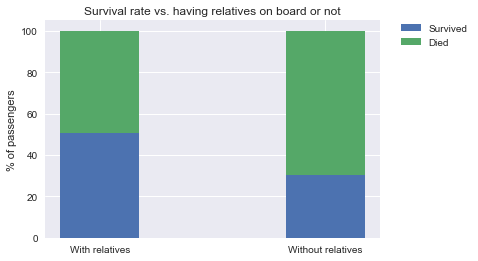

In [14]:
# create a list with the survival rate of each group (travelling with/without relatives)
survival_relative = []
survival_with_relative = 100 * titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch'] != 0)]['Survived'].mean()
survival_without_relative = 100 * titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch'] == 0)]['Survived'].mean()
survival_relative.append(survival_with_relative)
survival_relative.append(survival_without_relative)
survival_relative = np.array(survival_relative) # create the array necessary for the bar chart

# create a list with the death rate of each group (travelling with/without relatives)
died_relative = []
died_with_relative = 100 - survival_with_relative
died_without_relative = 100 - survival_without_relative
died_relative.append(died_with_relative)
died_relative.append(died_without_relative)
died_relative = np.array(died_relative) # create the array necessary for the bar chart


# plot survival and death rate for passengers grouped by whether they travelled with a relative or not
N = len(survival_relative)
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, survival_relative, width, label='Survived')
p2 = plt.bar(ind, died_relative, width, bottom=survival_relative, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival rate vs. having relatives on board or not')
plt.xticks(ind, ('With relatives', 'Without relatives'))
plt.yticks(np.arange(0, 110, 20))
# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Passengers who travelled with relatives on board survived at a higher rate (appr. 50%) than passengers travelling without relatives (appr. 30%)

### *Fare*

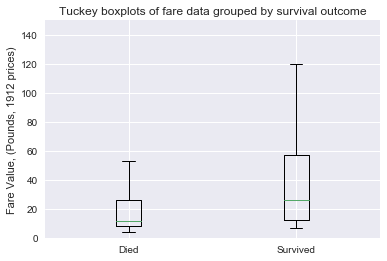

In [15]:
# Boxplot of fare by survival
fares_survived = titanic_df[titanic_df['Survived']==1]['FareNew']
fares_died = titanic_df[titanic_df['Survived']==0]['FareNew']

data = [fares_died, fares_survived]

fig, ax1 = plt.subplots()
bp = ax1.boxplot(data, labels=['Died', 'Survived'])

# Set y axis range to improve plot readability by excluding extreme outliers
ax1.set_ylim(0,150)

plt.title('Tuckey boxplots of fare data grouped by survival outcome')
plt.ylabel('Fare Value, (Pounds, 1912 prices)')

In the 'Died' and 'Survived' groups, the median values were 10.5 and 26.0, respectively. In general fares of surviving passengers tend to be higher than fares of passengers who died.<p>

The above chart does not contain all outliers, which were excluded by limiting the y axis for better visisbility of the interquartile range.

### *Grouping by age and sex*

Of the previous analyses, passenger class and sex seemed to be the factors that more strongly influence the survival outcome. The chart below shows survival rates for passengers grouped by class and sex. The chart shows that sex has a larger effect size on survival than passenger class. While around 50% of women in the third-class survived, less than 40% of the first-class male passengers survived.

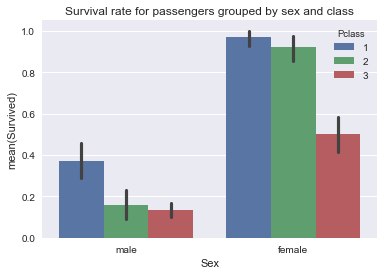

In [16]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)
plt.title('Survival rate for passengers grouped by sex and class')

## 2. Overview of the demographics of the Titanic passengers

### *How many men and women in the dataset*

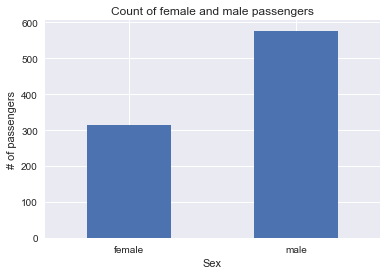

In [17]:
sex_distribution = titanic_df.groupby('Sex').count()['PassengerId']
sex_distribution.plot.bar(rot=0, ).set_ylabel('# of passengers')
plt.title('Count of female and male passengers')

The passenger distribution in the dataset is approximately 65% male and 35% female.

### *Passengers by class and sex*

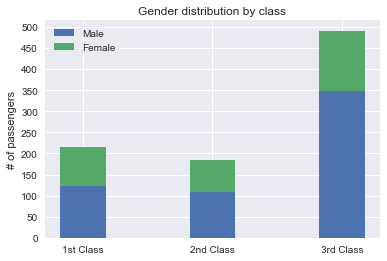

In [14]:
gender_class_count = titanic_df.groupby(['Sex', 'Pclass'], as_index=False).count()
N = 3
male_data = gender_class_count[gender_class_count['Sex']=='male']['PassengerId']
female_data = gender_class_count[gender_class_count['Sex']=='female']['PassengerId']
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, male_data, width)
p2 = plt.bar(ind, female_data, width,
             bottom=male_data)

plt.ylabel('# of passengers')
plt.title('Gender distribution by class')
plt.xticks(ind, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 520, 50))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

The chart above shows how the third class passengers were the majority. In all passenger classes there were more men than women.

### *Passengers age distribution by class*

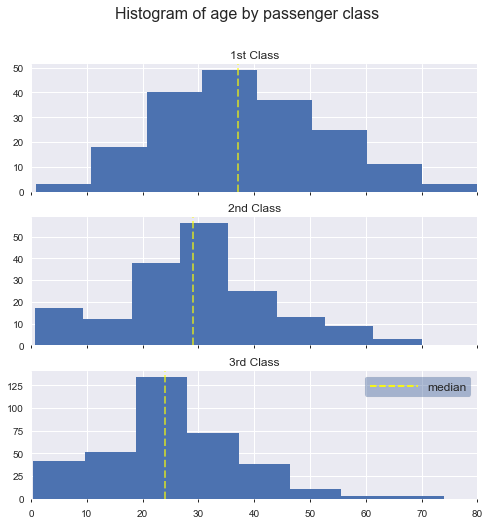

In [15]:
# make a histogram of age for each passenger class

# Get passenger data for each class
first_class_data = dropna_age_df[dropna_age_df['Pclass'] == 1]
second_class_data = dropna_age_df[dropna_age_df['Pclass'] == 2]
third_class_data = dropna_age_df[dropna_age_df['Pclass'] == 3]

# create 3 subplots
f, axarr = plt.subplots(3, sharex=True, figsize=(8,8))
plt.suptitle('Histogram of age by passenger class', fontsize=16)

# histogram of age for first class
axarr[0].hist(first_class_data['Age'], bins=8)
axarr[0].set_title('1st Class')
axarr[0].minorticks_on()
axarr[0].tick_params('x',length=3, which='major')

# histogram of age for second class
axarr[1].hist(second_class_data['Age'], bins=8)
axarr[1].set_title('2nd Class')
axarr[1].minorticks_on()
axarr[1].tick_params('x',length=3, which='major')

# histogram of age for third class
axarr[2].hist(third_class_data['Age'], bins=8)
axarr[2].set_title('3rd Class')
axarr[2].minorticks_on()
axarr[2].tick_params('x',length=3, which='major')
axarr[2].set_xlim(0,80) # to remove the space that existed on the left of the 0 value in the x axis

# locate the median of each distribution
axarr[0].axvline(first_class_data['Age'].median(), color='yellow', linewidth=2, linestyle='dashed', alpha=0.6)
axarr[1].axvline(second_class_data['Age'].median(), color='yellow', linewidth=2, linestyle='dashed', alpha=0.6)
axarr[2].axvline(third_class_data['Age'].median(), color='yellow', linewidth=2, linestyle='dashed', alpha=0.6)

# add legend for median
import matplotlib.lines as mlines
median_line = mlines.Line2D([], [], color='yellow',
                         label='median', linestyle='dashed')
plt.legend(handles=[median_line], frameon=True, facecolor='#3c5e96', fontsize=12, handlelength=4, framealpha=0.4)

The oldest passenger in our dataset was 80 years old. Interesting to not that the median and average age decrease as we go from the first to the third class. This is understandable, if we assume that younger people tend to have less purchasing power or less need to travel in luxury.

### *Embark Locations*

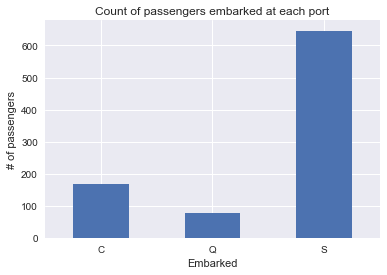

In [18]:
embark_locations = titanic_df.groupby('Embarked').count()['PassengerId']
embark_locations.plot.bar(rot=0).set_ylabel('# of passengers')
plt.title('Count of passengers embarked at each port')

The majority of passengers embarked in Southampton, followed by Cherbourg and then Queenstown.

### *Fare distribution by class*

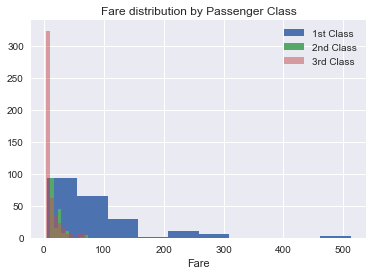

In [17]:
titanic_df[titanic_df['Pclass'] == 1]['FareNew'].hist(label='1st Class')
titanic_df[titanic_df['Pclass'] == 2]['FareNew'].hist(label='2nd Class')
titanic_df[titanic_df['Pclass'] == 3]['FareNew'].hist(label='3rd Class',alpha=0.5)
plt.legend()
plt.xlabel('Fare')
plt.title('Fare distribution by Passenger Class')

Some passengers were able to travel first class without paying a high price relative to second or third class. Therefore there were 3rd class passengers that paid a higher fare than some first class passengers. The highest fare value is 512. [Here is a Time article](http://time.com/money/4283738/titanic-most-expensive-ticket/) on what kind of luxury such a ticket would have bought on the Titanic.

### *Number of passengers per ticket*

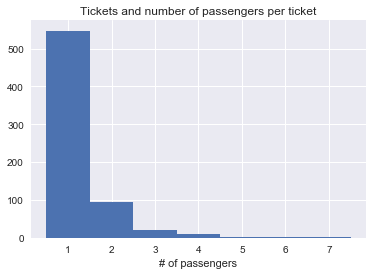

In [18]:
# Distribution of number of passengers per ticket
passengers_per_ticket = titanic_df.groupby('Ticket')['PassengerId'].count()
passengers_per_ticket.hist(bins=range(1,9), align='left')
plt.xlabel('# of passengers')
plt.title('Tickets and number of passengers per ticket')

In [19]:
shared_tickets = passengers_per_ticket > 1
'{number} tickets are "group" tickets'.format(number=np.sum(shared_tickets))

'134 tickets are "group" tickets'

## 3. Hypothesis Testing

The population is set to be all shipwrecks, past and future. The Titanic dataset, is assumed to be a sample of this fictitious population. A limitation of the dataset, is that is not known how the sample was chosen from the actual population of people that were on the Titanic. There could have been some sort of intentional or unintentional bias in how the sample was selected. This forces our conclusions about how survival and other variables are related to remain tentative. Nonetheless, statistical tests are now perfomed to demonstrate how statistical inference could be used to reach conclusions, if the sample was known to be random.

#### Question: Is a passenger's probability of survival independent of sex?

H<sub>0</sub>: Sex and survival are independent<br>
H<sub>A</sub>: Sex and survival are not independent

where H<sub>0</sub> is the null hypothesis and H<sub>A</sub> is the alternative hypothesis.

The significance level is chosen to be 0.05. For this scenario a Chi-square test of independence is appropriate because:
  - both variables (survival and gender) are categorical
  - observations are independent (a passenger is either a woman or a man and either survives or dies)
  - the expected frequency count for each cell of the contingency table is larger than 5

In [20]:
print('The contingency table without marginal totals:')
survived_sex = pd.crosstab(index=titanic_df['Survived'], columns=titanic_df['Sex'])
survived_sex

The contingency table without marginal totals:


Sex,female,male
Survived,,
0,81,468
1,233,109


In [21]:
from scipy import stats

# return in the following order: the test statistic, p-value of the test, degrees of freedom, expected frequencies
stats.chi2_contingency(survived_sex)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  355.52525253],
        [ 120.52525253,  221.47474747]]))

The chi-square value ( $\chi^2$ = 260.72) is the Yates chi-square, corrected for continuity. Its p-value is < 0.05 and therefore we reject the null hypothesis and conclude that women are more likely to survive a shipwreck.

#### Question: Is a passenger's probability of survival independent of class?

H<sub>0</sub>: Class and survival are independent<br>
H<sub>A</sub>: Class and survival are not independent
    
The conditions are the same as in the previous test and therefore a Chi-square test of independence is appropriate.

In [22]:
print('The contingency table without marginal totals:')
survived_class = pd.crosstab(index=titanic_df['Survived'], columns=titanic_df['Pclass'])
survived_class

The contingency table without marginal totals:


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [23]:
# return in the following order: the test statistic, p-value of the test, degrees of freedom, expected frequencies
stats.chi2_contingency(survived_class)

(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,  113.37373737,  302.53535354],
        [  82.90909091,   70.62626263,  188.46464646]]))

Since the p-value of the test-statistic is lower than the significance value (0.05) 
we reject the null hypothesis and conclude that passengers in first class are more likely to survive than passengers in the second and third classes.

## Conclusion

To conclude it is helpful to look back at the goals of the project:

1\. *Determine which factors made Titanic passengers more likely to survive*

The analysis performed only determines which factors made passengers **in the dataset** more likely to survive, and therefore any conclusion about the population of all Titanic passengers is just tentative.

The relation between survival and other variables was analyzed and for each variable differences in survival rate between passenger groups were found. The most significant differences observed were: female passengers survived at a much higher rate than male ones and that first class passengers survived at a much higher rate than third class passengers. 

To achieve goal 1, the analysis would need to be repeated using the full Titanic dataset or using a random sample and with it do statistical inference.

2\. *Provide an overview of the demographics of the passengers in the dataset*

This was accomplished by analyzing the number of passengers by sex, class, age group and embark location. Additionaly, fare distribution by class and number of passengers per ticket were also observed.

3\. *Draw conclusions about the relationships between passenger sex, class and the likelihood of surviving a shipwreck*

Two tentative conclusions can be put forward regarding survival outcome in case of a shipwreck: (i) women are more likely to survive a shipwreck and (ii) passengers in first class are more likely to survive than passengers in the second and third classes. Without knowing if our sample is random, these conclusions must remain tentative.

Future work to achieve the goal includes using the full Titanic dataset or a sample of it that is confirmed to be random. Potential areas to explore that would improve the analysis are obtaining datasets of other shipwrecks, calculating effect sizes and performing statistical tests for the relation between survival and the variables other than sex and class.

---

Footnote:<br>
1 https://www.encyclopedia-titanica.org<p>

Other links in the notebook:<br>
https://www.udacity.com/course/data-analyst-nanodegree--nd002<br>
https://www.kaggle.com/c/titanic/data<br>
http://time.com/money/4283738/titanic-most-expensive-ticket/